<a href="https://colab.research.google.com/github/Sukoshi2/GuitarChordsClassification/blob/main/Kunci_Gitar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install split-folders tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import splitfolders
import os

Input Folder untuk dibagi menjadi train dan val

In [4]:
base_dir = '/content/drive/MyDrive/Data foto'

# Preprocessing

In [5]:
splitfolders.ratio(
    base_dir,
    output='ready_dataset',
    ratio=(.7, 0.1,0.2)
)

Copying files: 1414 files [00:52, 27.02 files/s]


Menambahkan masing masing folder untuk train dan validation

In [10]:
train_dir = 'ready_dataset/train'
val_dir = 'ready_dataset/val' 
test_dir = 'ready_dataset/test'

os.listdir(test_dir)

['B', 'G', 'D', 'E', 'A', 'C', 'F']

In [11]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
#def to_grayscale_then_rgb(image):
    #original = tf.constant([[[32, 150, 3.0]]])
    #image = tf.image.rgb_to_grayscale(image)
    #return image 

In [12]:
# augmentasi gambar
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20, # memutar gambar
                    brightness_range=(0.5,1.0), # value < 1 lebih gelap
                    shear_range=0.2, # untuk mengatur skala image
                    zoom_range=(0.8,1.0), # value < 1 akan zoom in
                    fill_mode='nearest', # untuk mengisi gambar atau wadah yang tidak memiliki nilai
                    #preprocessing_function=to_grayscale_then_rgb,
                    horizontal_flip=True,
                    vertical_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [20]:
train_generator = train_datagen.flow_from_directory(
    train_dir, # direktori data train
    target_size=(150,150), # mengubah resolusi seluruh gambar jadi 150*150
    batch_size=32,# untuk menentukan jumlah image yang akan dimasukkan ke dalam steps training
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

Found 987 images belonging to 7 classes.
Found 140 images belonging to 7 classes.
Found 287 images belonging to 7 classes.


# Visualisasi

In [21]:
class_name = ['A','B','C','D','E','F','G']

In [22]:
image, label = train_generator.next()

In [23]:
len(image)

32

In [24]:
label

array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0.],
 

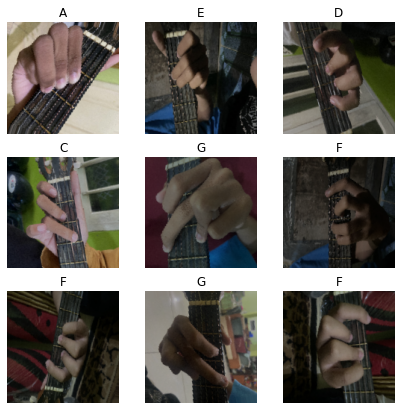

In [27]:
plt.figure(figsize=(7,7))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image[i])
  plt.title(class_name[tf.argmax(label[i])])
  plt.axis("off")

(32, 150, 150, 3)


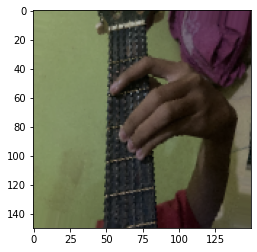

(32, 150, 150, 3)


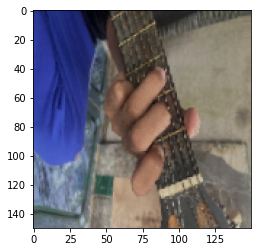

(32, 150, 150, 3)


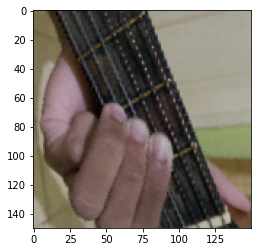

(32, 150, 150, 3)


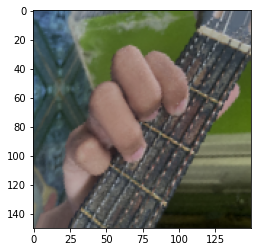

(32, 150, 150, 3)


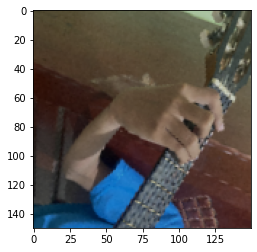

(32, 150, 150, 3)


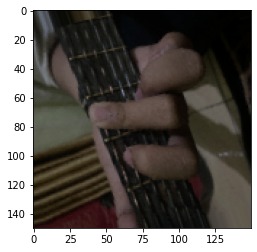

(32, 150, 150, 3)


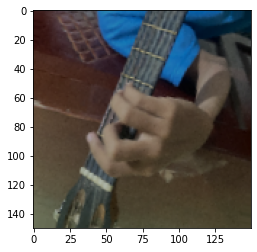

In [28]:
  for _ in range(7):
    img, label = train_generator.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

# Modeling

In [29]:
from tensorflow import keras

In [30]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

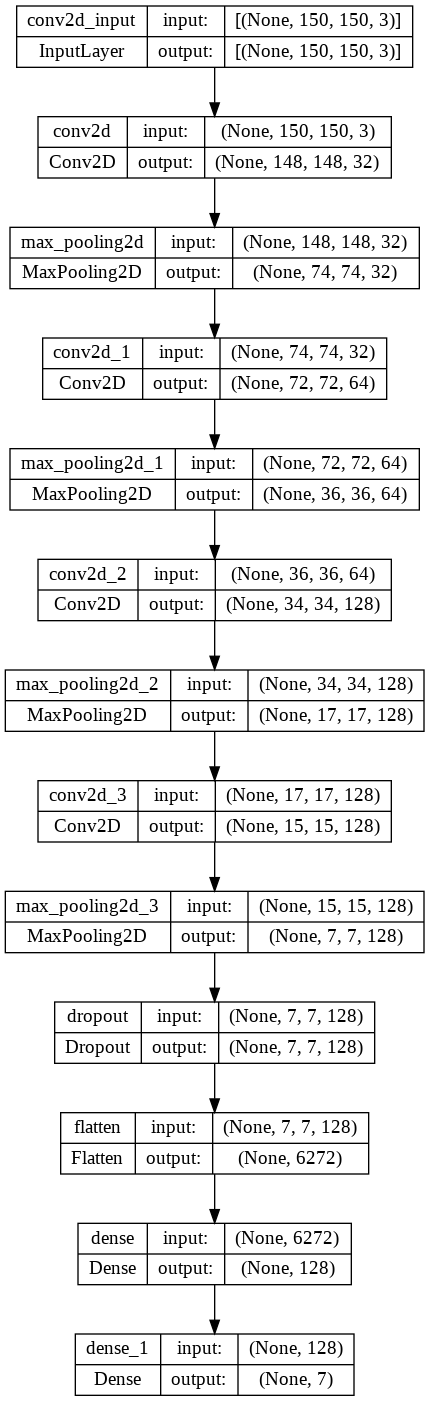

In [32]:
from tensorflow.keras.utils import plot_model
plot_model(model,'model.png',show_shapes=True)

In [33]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training

In [ ]:
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator, # untuk akurasi pengujian data
)

Epoch 1/25
31/31 [==============================] - 215s 7s/step - loss: 1.9501 - accuracy: 0.1358 - val_loss: 1.9433 - val_accuracy: 0.1429
Epoch 2/25
31/31 [==============================] - 198s 6s/step - loss: 1.9421 - accuracy: 0.1540 - val_loss: 1.9193 - val_accuracy: 0.2714
Epoch 3/25
31/31 [==============================] - 198s 6s/step - loss: 1.8692 - accuracy: 0.2401 - val_loss: 2.1986 - val_accuracy: 0.2000
Epoch 4/25
31/31 [==============================] - 196s 6s/step - loss: 1.7148 - accuracy: 0.3283 - val_loss: 2.1545 - val_accuracy: 0.2500
Epoch 5/25
31/31 [==============================] - 198s 6s/step - loss: 1.5008 - accuracy: 0.3961 - val_loss: 1.6136 - val_accuracy: 0.4286
Epoch 6/25
31/31 [==============================] - 198s 6s/step - loss: 1.3360 - accuracy: 0.5025 - val_loss: 2.7684 - val_accuracy: 0.3000
Epoch 7/25
31/31 [==============================] - 197s 6s/step - loss: 1.3167 - accuracy: 0.4894 - val_loss: 1.1886 - val_accuracy: 0.5143
Epoch 8/25
31

In [ ]:
model.save('/content/drive/MyDrive/Hasil Model Kunci Gitar')
model.save('/content/drive/MyDrive/Hasil Model Kunci Gitar.h5')

# Evaluate

In [ ]:
test_evaluate = model.evaluate(test_generator, verbose=0)

print(f'Test loss     : {test_evaluate[0]}')
print(f'Test accuracy : {round(test_evaluate[1],2)}') #dibulatkan 2 artinya 2 angka di belakang koma

Test loss     : 0.49271926283836365
Test accuracy : 0.86


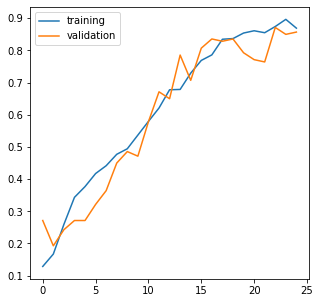

In [ ]:
plt.figure(1, figsize=(5,5))
plt.plot(range(len(history.history['accuracy'])), 
         history.history['accuracy'],
         label='training')
plt.plot(range(len(history.history['val_accuracy'])), 
         history.history['val_accuracy'],
         label='validation')
plt.legend()
plt.show()

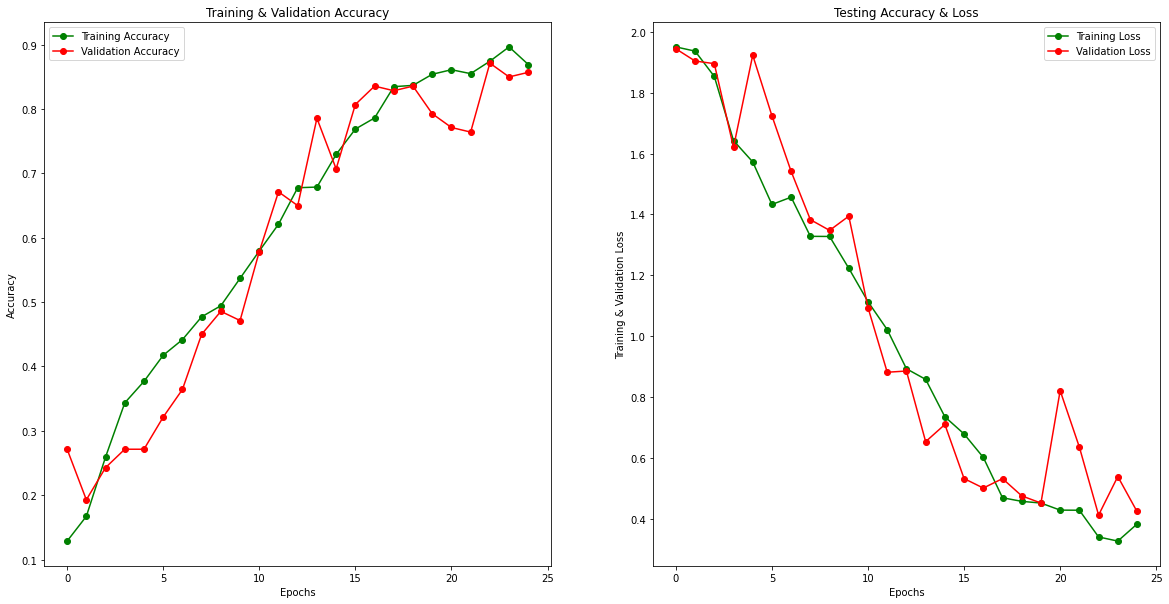

In [ ]:
epochs = [i for i in range(25)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred = model.predict(test_generator)

9/9 [==============================] - 46s 5s/step


In [ ]:
y_pred

array([[2.3239018e-05, 1.2478980e-03, 2.7661480e-04, ..., 1.7074420e-01,
        1.7521131e-07, 8.2769781e-01],
       [9.5040477e-06, 9.9962568e-01, 8.9539481e-07, ..., 4.1103968e-07,
        8.3417526e-06, 1.0374569e-09],
       [1.9062268e-10, 1.2308334e-03, 2.9071420e-01, ..., 2.0223914e-02,
        4.2136371e-01, 8.9565649e-05],
       ...,
       [9.9995077e-01, 1.8934612e-07, 6.9523194e-16, ..., 4.8954687e-05,
        4.7189506e-15, 8.4939757e-11],
       [2.8440670e-17, 5.2221522e-02, 1.5640048e-04, ..., 2.4248888e-11,
        9.4762051e-01, 2.5621813e-10],
       [4.5484059e-05, 5.8014446e-01, 4.4267394e-02, ..., 1.4869320e-01,
        1.8964991e-05, 2.2682457e-01]], dtype=float32)

In [ ]:
y_predict = np.argmax(y_pred, axis=1).tolist()

In [ ]:
print(classification_report(test_generator.labels, y_predict, target_names = class_name))

# Mencoba Program dengan upload data gambar untuk di cek hasilnya

In [ ]:
from google.colab import files
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

In [ ]:
upload = files.upload()

Saving IMG_1497.jpeg to IMG_1497.jpeg


1/1 [==============================] - 0s 20ms/step
IMG_1497.jpeg
G


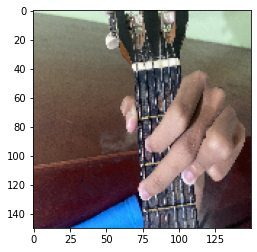

In [ ]:
for fn in upload.keys():

  path = fn
  img = keras.utils.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  image = np.vstack([x])
  classes = model.predict(image, batch_size=3)

  print(fn)
  if classes[0][0] == 1:
    print('A')
  elif classes[0][1] == 1:
    print('B')
  elif classes[0][2] == 1:
    print('C')
  elif classes[0][3] == 1:
    print('D')
  elif classes[0][4] == 1:
    print('E')
  elif classes[0][5] == 1:
    print('F')
  else:
    print('G')